In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 3s 0us/step


In [9]:
print('train data: ',train_data[0])
print('train labels:',train_labels[0])

train data:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
train labels: 1


In [10]:
max([max(sequence) for sequence in train_data])

9999

In [11]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [12]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [16]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
print('train data: ', x_train[0])

train data:  [0. 1. 1. ... 0. 0. 0.]


In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [20]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

If result printed probability, then using crossentropy is best option we can choose.

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [25]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 7s 150ms/step - loss: 0.5318 - accuracy: 0.7654 - val_loss: 0.4107 - val_accuracy: 0.8594
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3339 - accuracy: 0.8915 - val_loss: 0.3201 - val_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2478 - accuracy: 0.9179 - val_loss: 0.3094 - val_accuracy: 0.8744
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2036 - accuracy: 0.9331 - val_loss: 0.3197 - val_accuracy: 0.8684
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1664 - accuracy: 0.9475 - val_loss: 0.2832 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1432 - accuracy: 0.9543 - val_loss: 0.3063 - val_accuracy: 0.8799
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1243 - accuracy: 0.9612 - val_loss: 0.2949 - val_accuracy: 0.8852
Epoch 8/20
3

In [28]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

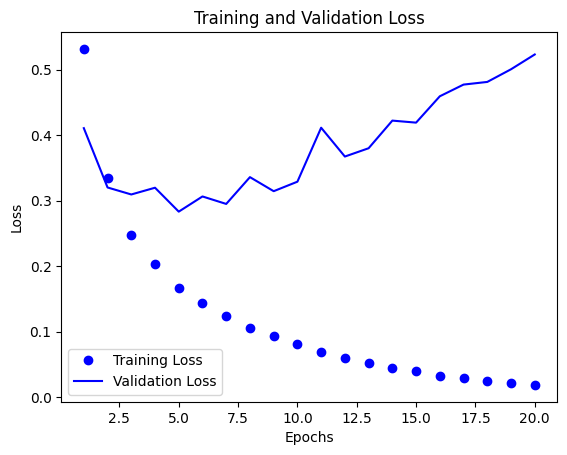

In [30]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

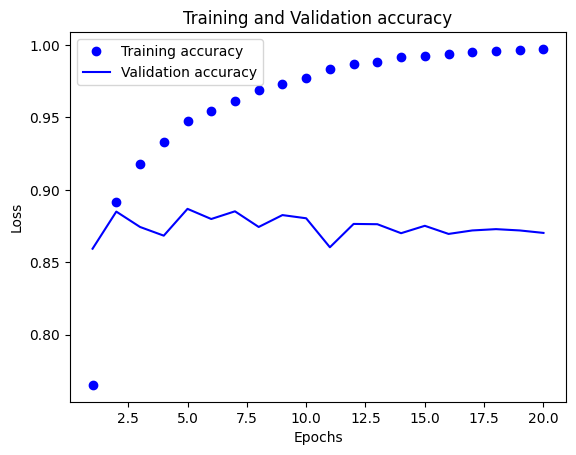

In [31]:
plt.clf()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.4837 - accuracy: 0.7993
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2807 - accuracy: 0.9017
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2176 - accuracy: 0.9209
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2822 - accuracy: 0.8880


In [37]:
results

[0.28218337893486023, 0.8879600167274475]

Epoch 1/4
49/49 [==============================] - 2s 41ms/step - loss: 0.1072 - accuracy: 0.9644 - val_loss: 0.0968 - val_accuracy: 0.9700
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0950 - accuracy: 0.9689 - val_loss: 0.0748 - val_accuracy: 0.9823
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.0871 - accuracy: 0.9714 - val_loss: 0.0728 - val_accuracy: 0.9806
Epoch 4/4
49/49 [==============================] - 1s 19ms/step - loss: 0.0792 - accuracy: 0.9749 - val_loss: 0.0670 - val_accuracy: 0.9826


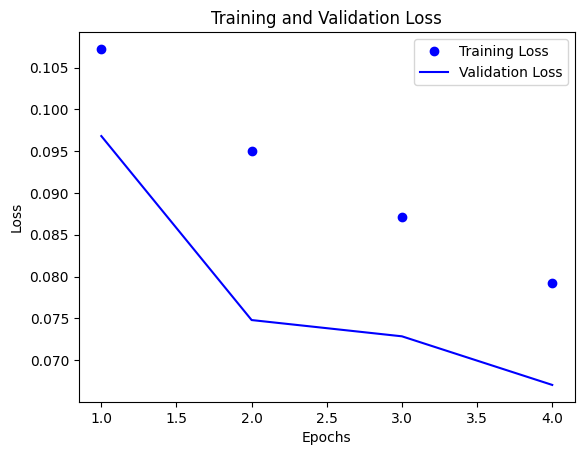

In [38]:
history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.04154762],
       [0.99995315],
       [0.03608067],
       ...,
       [0.03638912],
       [0.00902603],
       [0.7939732 ]], dtype=float32)

Epoch 1/4
49/49 [==============================] - 4s 46ms/step - loss: 0.4654 - accuracy: 0.8195 - val_loss: 0.3267 - val_accuracy: 0.8997
Epoch 2/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2955 - accuracy: 0.8998 - val_loss: 0.2443 - val_accuracy: 0.9214
Epoch 3/4
49/49 [==============================] - 1s 18ms/step - loss: 0.2388 - accuracy: 0.9167 - val_loss: 0.2178 - val_accuracy: 0.9254
Epoch 4/4
49/49 [==============================] - 1s 19ms/step - loss: 0.2091 - accuracy: 0.9274 - val_loss: 0.1835 - val_accuracy: 0.9409


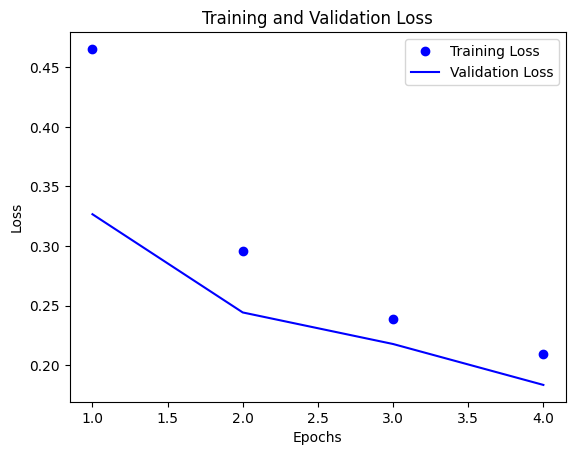

In [41]:
#1 hidden layer

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [43]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.2777 - accuracy: 0.8887


[0.2777477502822876, 0.8886799812316895]

Epoch 1/4
49/49 [==============================] - 4s 47ms/step - loss: 0.4619 - accuracy: 0.8076 - val_loss: 0.2917 - val_accuracy: 0.8981
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2629 - accuracy: 0.9040 - val_loss: 0.2175 - val_accuracy: 0.9190
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2045 - accuracy: 0.9251 - val_loss: 0.1559 - val_accuracy: 0.9519
Epoch 4/4
49/49 [==============================] - 1s 21ms/step - loss: 0.1763 - accuracy: 0.9357 - val_loss: 0.1601 - val_accuracy: 0.9398


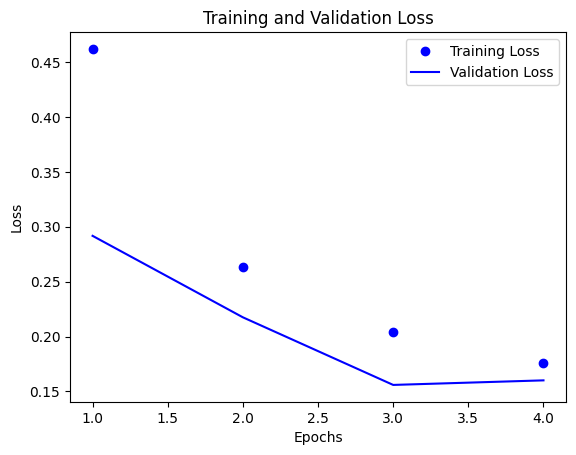

In [44]:
#3 hidden layer

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.3283 - accuracy: 0.8724


[0.3282712399959564, 0.872439980506897]

Epoch 1/4
49/49 [==============================] - 4s 47ms/step - loss: 0.4360 - accuracy: 0.8200 - val_loss: 0.2692 - val_accuracy: 0.9109
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2585 - accuracy: 0.9031 - val_loss: 0.1920 - val_accuracy: 0.9373
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2035 - accuracy: 0.9238 - val_loss: 0.1614 - val_accuracy: 0.9450
Epoch 4/4
49/49 [==============================] - 1s 22ms/step - loss: 0.1756 - accuracy: 0.9344 - val_loss: 0.2258 - val_accuracy: 0.8998


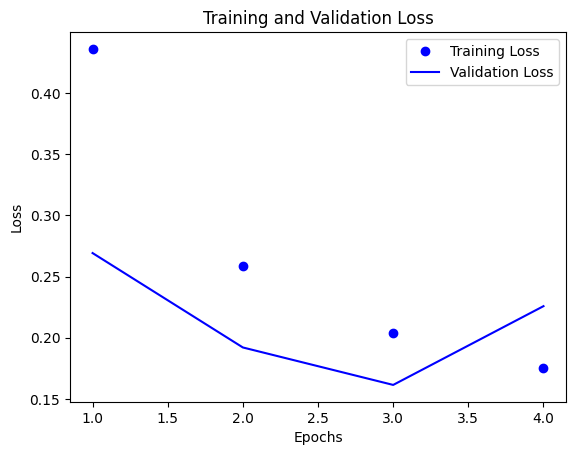

In [46]:
#32 hidden unit

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [47]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.3979 - accuracy: 0.8458


[0.3978807330131531, 0.8458399772644043]

Epoch 1/4
49/49 [==============================] - 5s 54ms/step - loss: 0.4413 - accuracy: 0.7967 - val_loss: 0.2716 - val_accuracy: 0.8986
Epoch 2/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2630 - accuracy: 0.8986 - val_loss: 0.2761 - val_accuracy: 0.8771
Epoch 3/4
49/49 [==============================] - 2s 34ms/step - loss: 0.2145 - accuracy: 0.9179 - val_loss: 0.1532 - val_accuracy: 0.9524
Epoch 4/4
49/49 [==============================] - 2s 35ms/step - loss: 0.1810 - accuracy: 0.9307 - val_loss: 0.1507 - val_accuracy: 0.9481


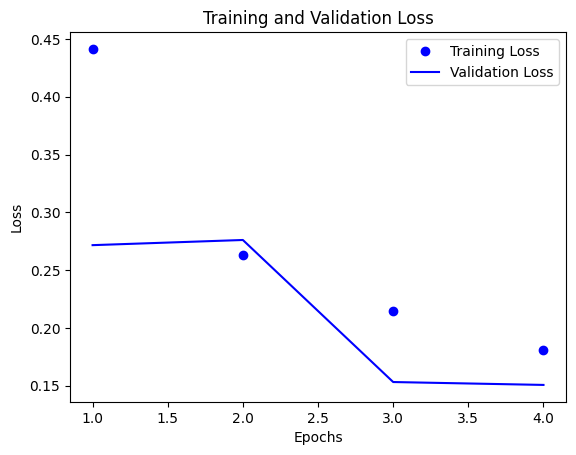

In [48]:
#32 hidden unit

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [49]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 3s 4ms/step - loss: 0.3335 - accuracy: 0.8688


[0.3334999084472656, 0.8687999844551086]

Epoch 1/4
49/49 [==============================] - 7s 116ms/step - loss: 0.1642 - accuracy: 0.8090 - val_loss: 0.1045 - val_accuracy: 0.8916
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.0929 - accuracy: 0.8920 - val_loss: 0.0746 - val_accuracy: 0.9171
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.0731 - accuracy: 0.9138 - val_loss: 0.0611 - val_accuracy: 0.9325
Epoch 4/4
49/49 [==============================] - 1s 20ms/step - loss: 0.0629 - accuracy: 0.9242 - val_loss: 0.0526 - val_accuracy: 0.9420


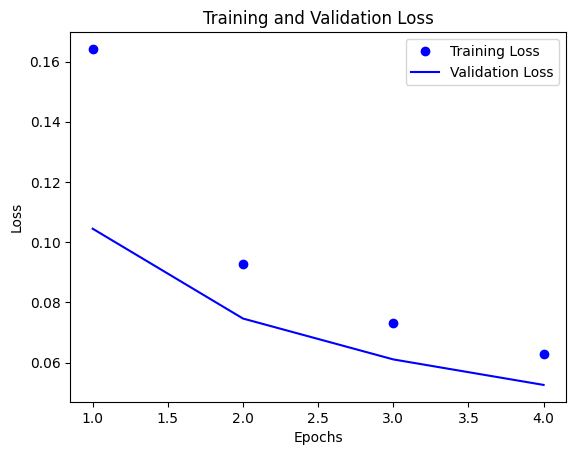

In [50]:
#mse loss function

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [51]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 3s 3ms/step - loss: 0.0854 - accuracy: 0.8847


[0.08536181598901749, 0.8846799731254578]

Epoch 1/4
49/49 [==============================] - 4s 40ms/step - loss: 0.4364 - accuracy: 0.8234 - val_loss: 0.2792 - val_accuracy: 0.9043
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.2486 - accuracy: 0.9084 - val_loss: 0.2137 - val_accuracy: 0.9182
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1941 - accuracy: 0.9280 - val_loss: 0.1446 - val_accuracy: 0.9529
Epoch 4/4
49/49 [==============================] - 1s 20ms/step - loss: 0.1609 - accuracy: 0.9415 - val_loss: 0.2008 - val_accuracy: 0.9135


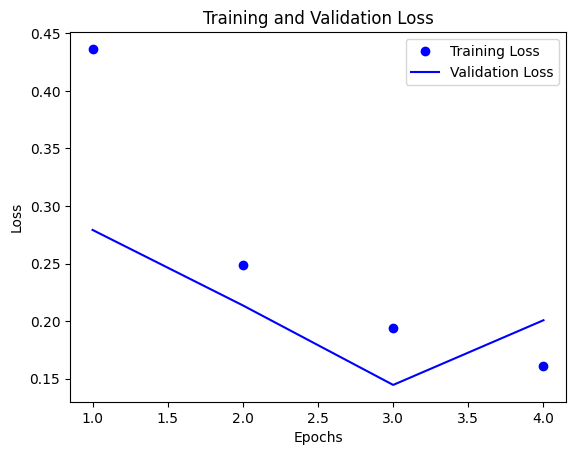

In [52]:
#tanh activation function

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=4, batch_size=512, validation_data=(x_val,y_val))
history_dict = history.history

import matplotlib.pyplot as plt

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [53]:
results = model.evaluate(x_test,y_test)
results

782/782 [==============================] - 2s 3ms/step - loss: 0.4160 - accuracy: 0.8459


[0.4160344898700714, 0.8458799719810486]